# 리뷰

- 과제 리뷰
- 설문 리뷰





# 정적 웹 페이지 크롤링

- html 페이지 파싱하기 : beautifulsoup   


## beautifulsoup 설치

- 설치되어 있음 
 
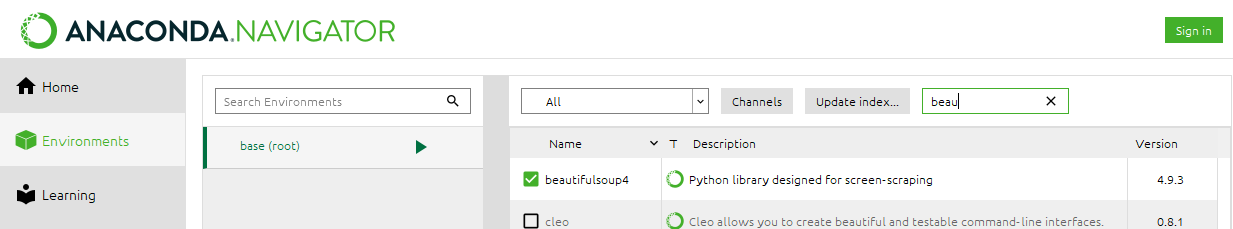

- 다른 환경에서는

pip install beautifulsoup4


## 실행 

- 연습용 html 로 실행
- BeautifulSoup() : 파싱
- soup : 파싱된 객체
- prettify() : 파싱된 객체 구조를 예쁘게 보여줌

In [1]:
from bs4 import BeautifulSoup 

html= '''
<h1 id="title">숭실대학교</h1>
<div class="top">
<ul class="menu">  <li> <a href=http://www.ssu.ac.kr/member/login.html class="login">로그인 </a></li></ul>
<ul class="dept"> 
    <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>
    <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>
    <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>
</ul>
</div>
'''

soup=BeautifulSoup (html, 'html.parser')

print ( soup.prettify())

<h1 id="title">
 숭실대학교
</h1>
<div class="top">
 <ul class="menu">
  <li>
   <a class="login" href="http://www.ssu.ac.kr/member/login.html">
    로그인
   </a>
  </li>
 </ul>
 <ul class="dept">
  <li>
   <a href="http://www.ssu.ac.kr/sw/">
    소프트웨어학부
   </a>
  </li>
  <li>
   <a href="http://www.ssu.ac.kr/ai/">
    AI융합학부
   </a>
  </li>
  <li>
   <a href="http://www.ssu.ac.kr/stat/">
    정보통계학부
   </a>
  </li>
 </ul>
</div>



## 파싱된 객체 보기

- 파싱 : 텍스트 -> 객체 , 브라우저가 하는 일

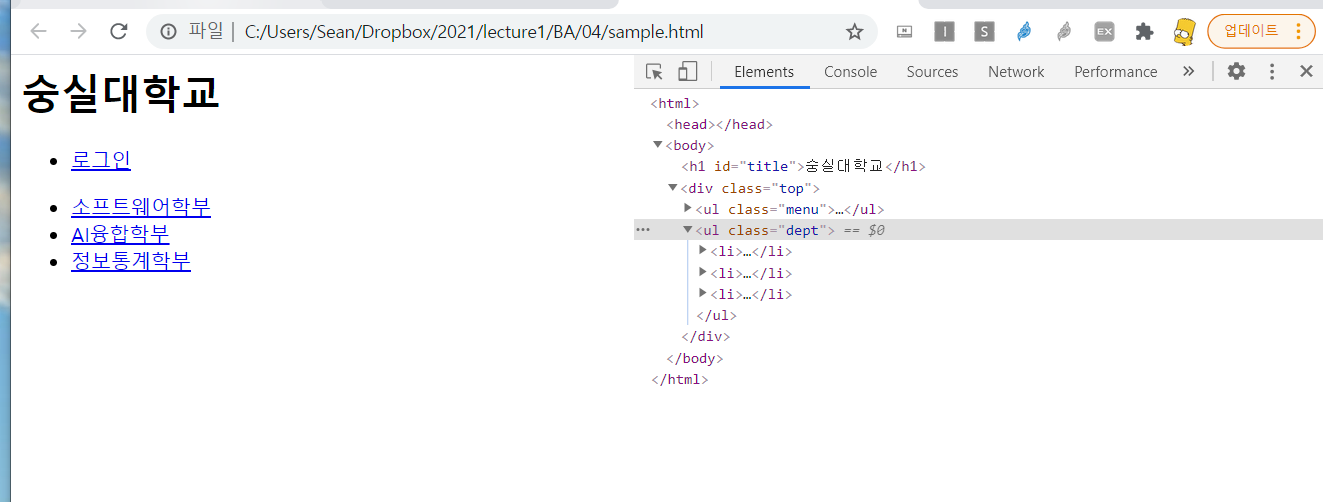

- soup 객체 : 파이썬에서 html 태그에 접근


In [2]:
soup.h1

<h1 id="title">숭실대학교</h1>

In [3]:
soup.ul  # 첫번째 아이템만 보여줌

<ul class="menu"> <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li></ul>

In [4]:
soup.li

<li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li>

- 아이템이 여러개인 경우 : find_all () => list로 return 함

In [5]:
soup.find_all("ul")

[<ul class="menu"> <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li></ul>,
 <ul class="dept">
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>
 </ul>]

In [6]:
soup.find_all("li")

[<li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li>,
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>]

## 검색

- attrs : tag의 속성 이름과 값을 dict 로 구성

In [7]:
tag_a= soup.a #첫번째
tag_a

<a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a>

In [8]:
tag_a.attrs 

{'href': 'http://www.ssu.ac.kr/member/login.html', 'class': ['login']}

In [9]:
tag_a['href']  # = tag_a.attrs['href']

'http://www.ssu.ac.kr/member/login.html'

- find(), find_all()  : 태그, 속성, string, re, list 등등 으로찾기

In [10]:
soup.find_all('li')

[<li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li>,
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>]

In [11]:
# 속성
soup.find_all (id="title")

[<h1 id="title">숭실대학교</h1>]

In [12]:
# class 속성은 아래 처럼 표기  class="dept"는 error 남
soup.find_all( attrs={'class':'dept'} )  

[<ul class="dept">
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>
 </ul>]

In [13]:
# list
soup.find_all (['ul','li'])

[<ul class="menu"> <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li></ul>,
 <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li>,
 <ul class="dept">
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>
 </ul>,
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>]

In [14]:
# text 찾기 : string =   ; exact matching

soup.find(string="소프트웨어학부")

'소프트웨어학부'

In [15]:
# 부분 matching re

import re
soup.find_all(string =re.compile("학부"))

['소프트웨어학부', 'AI융합학부', '정보통계학부']

* .string : markup 제외 텍스트만 가져오기 

In [29]:
title = soup.find(id="title")
title.string

'숭실대학교'

In [17]:
all= soup.find_all("a")
for item in all:
    print (item.string)

로그인 
소프트웨어학부
AI융합학부
정보통계학부


In [30]:
soup.find ("a")

<a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a>

In [31]:
soup.find_all ("a")

[<a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a>,
 <a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a>,
 <a href="http://www.ssu.ac.kr/ai/">AI융합학부</a>,
 <a href="http://www.ssu.ac.kr/stat/">정보통계학부</a>]

- select ( 계층구조)  : 중간에 attr.value


In [18]:
soup.select( "div > ul.dept > li ")

[<li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>]

In [19]:
soup.select ("a")

[<a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a>,
 <a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a>,
 <a href="http://www.ssu.ac.kr/ai/">AI융합학부</a>,
 <a href="http://www.ssu.ac.kr/stat/">정보통계학부</a>]

- 기타 참조 문서

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

## 크롤링 해보기

- 크롤링 허용 정책 확인  : 사이트주소/robots.txt   
    예) http://www.hanbit.co.kr/robots.txt
   - 없으면 허용
   
- 할리스 커피 : 매장 정보 크롤링
    - https://www.hollys.co.kr/store/korea/korStore2.do
    - html 소스 보기 : CTRL+U 또는 [F12]
    
- 소스 위치 및 검색 구조 파악
    - 소스위치 "매장명"으로 검색
    - 페이지 넘김
    - 검색키워드 넣어보기

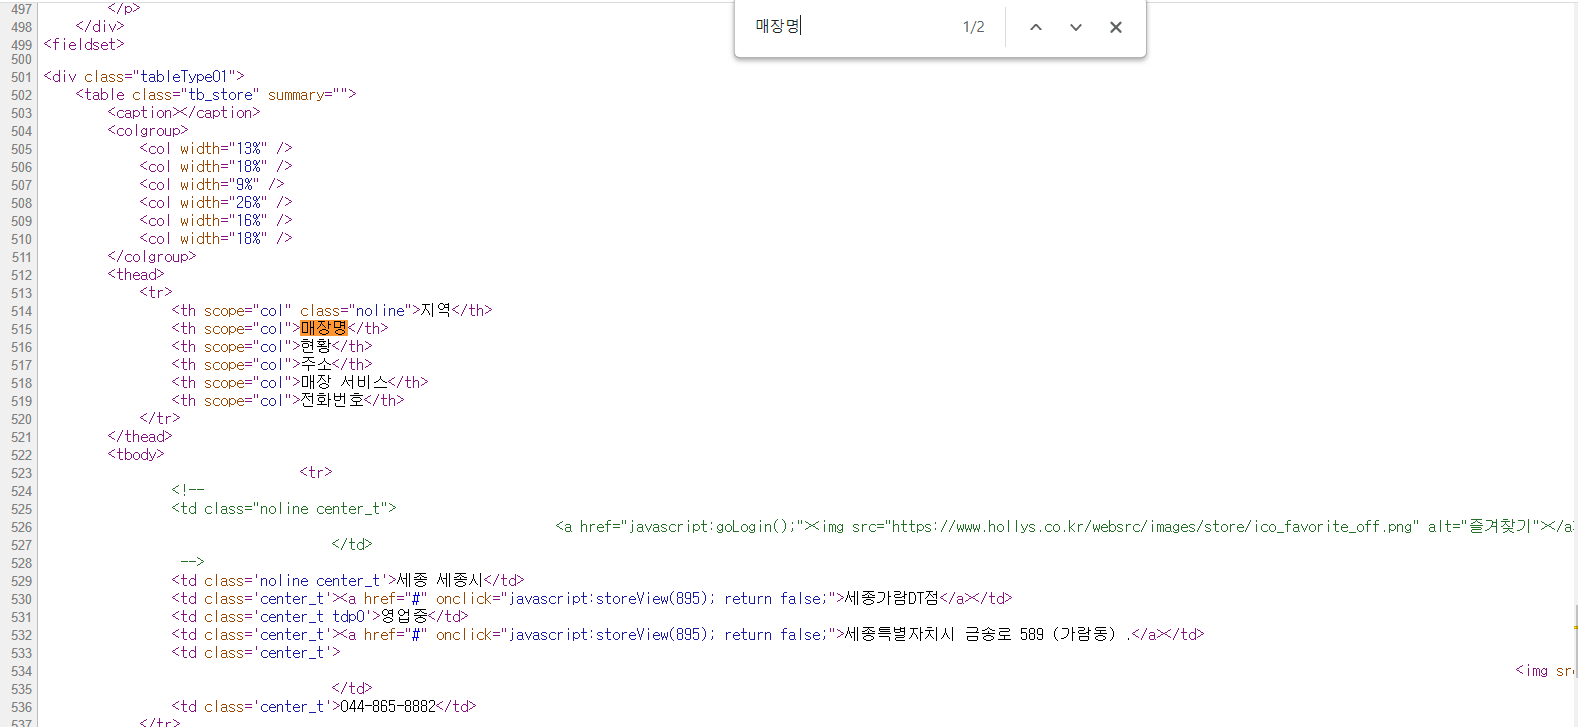

## 크롤링 코드 

1. 크롤링 

In [20]:
import urllib.request
hollys_url="https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store="

html= urllib.request.urlopen(hollys_url)
print (html)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

2. 파싱

In [ ]:
from bs4 import BeautifulSoup
soup= BeautifulSoup(html, 'html.parser')
soup

3. 찾기 

In [ ]:
tbody= soup.find("tbody")
tbody.prettify()

4. 분해하기

In [28]:
tr=tbody.find('tr')
tr

NameError: name 'tbody' is not defined

In [ ]:
tds=tr.find_all('td')
tds

In [ ]:
for td in tds:
    print (td.string)

5,  pandas 데이터프레임 만들기

- list로  만들기 

In [ ]:
result=[]
trs=tbody.find_all('tr')
for tr in trs:
    tds=tr.find_all('td')
    name=tds[1].string
    sido=tds[0].string
    addr=tds[3].string
    phone=tds[5].string
    result.append([name,sido,addr,phone])

result

- 데이터 프레임 만들기

In [ ]:
import pandas as pd
hollys_df= pd.DataFrame (result , columns=("store","sido","address", "phone" ) )
hollys_df.head()

6. 저장하기 :  csv 로 저장

hollys_df.to_csv("파일이름", encoding="cp949", mode="w", index=True) 


1.1 여러 페이지 가져오기

In [ ]:
for page in range(1,58):
    hollys_url= "https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=%d&sido=&gugun=&store="%page
    print (hollys_url)


## 전체 프로그램

In [26]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime


def hollys_store(result):
    for page in range(1,59):
        Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore.do?pageNo=%d&sido=&gugun=&store=' %page
        print(Hollys_url)
        html = urllib.request.urlopen(Hollys_url)
        soupHollys = BeautifulSoup(html, 'html.parser')
        tag_tbody = soupHollys.find('tbody')
        for store in tag_tbody.find_all('tr'):
            if len(store) <= 3: 
                break
            store_td = store.find_all('td')
            store_name = store_td[1].string
            store_sido = store_td[0].string
            store_address = store_td[3].string
            store_phone = store_td[5].string
            result.append([store_name]+[store_sido]+[store_address]
                          +[store_phone])
    return


def main():
    result = []
    print('Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    hollys_store(result)   #[CODE 1] 호출 
    hollys_tbl = pd.DataFrame(result, columns=('store', 'sido-gu', 'address','phone'))
    hollys_tbl.to_csv('hollys.csv', encoding='cp949', mode='w', index=True)
    del result[:]
       
if __name__ == '__main__':
     main()


Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=1&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=2&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=3&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=4&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=5&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=6&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=7&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=8&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=9&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=10&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=11&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=12&sido=&gugun=&store=
https://www.

## 과제1 : 다른 프랜차이즈 가맹점 정보 크롤링해서 csv로 저장하기  (정적 웹페이지) 

- hw04.ipynb  파일로 제출
- 사이트에 대한 간단한 설명 몇줄
- select 사용하기

In [39]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime


def Gamtan_store(result):
    for page in range(0,301,15):
        Gamtan_url = 'http://www.gamtan.co.kr/main/store_list.php?page_idx=166&startPage=%d&gubun=&add_code=&keyword=' %page
        print(Gamtan_url)
        html = urllib.request.urlopen(Gamtan_url)
        soupGamtan = BeautifulSoup(html, 'html.parser')
        tag_tbody = soupGamtan.select_one('tbody')
        for store in tag_tbody.select('tr'):
            if len(store) <= 3:
                break
            store_td = store.select('td')
            store_name = store_td[0].string
            store_address = store_td[1].string
            store_phone = store_td[2].string
            result.append([store_name]+[store_address]+[store_phone])
    return


def main():
    result = []
    print('Gamtan store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    Gamtan_store(result)
    Gamtan_tbl = pd.DataFrame(result, columns=('store', 'address','phone'))
    Gamtan_tbl.to_csv('Gamtan.csv', encoding='cp949', mode='w', index=True)
    del result[:]
       
if __name__ == '__main__':
     main()


Gamtan store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>
http://www.gamtan.co.kr/main/store_list.php?page_idx=166&startPage=0&gubun=&add_code=&keyword=
http://www.gamtan.co.kr/main/store_list.php?page_idx=166&startPage=15&gubun=&add_code=&keyword=
http://www.gamtan.co.kr/main/store_list.php?page_idx=166&startPage=30&gubun=&add_code=&keyword=
http://www.gamtan.co.kr/main/store_list.php?page_idx=166&startPage=45&gubun=&add_code=&keyword=
http://www.gamtan.co.kr/main/store_list.php?page_idx=166&startPage=60&gubun=&add_code=&keyword=
http://www.gamtan.co.kr/main/store_list.php?page_idx=166&startPage=75&gubun=&add_code=&keyword=
http://www.gamtan.co.kr/main/store_list.php?page_idx=166&startPage=90&gubun=&add_code=&keyword=
http://www.gamtan.co.kr/main/store_list.php?page_idx=166&startPage=105&gubun=&add_code=&keyword=
http://www.gamtan.co.kr/main/store_list.php?page_idx=166&startPage=120&gubun=&add_code=&keyword=
http://www.gamtan.co.kr/main/store_list.php?page_idx=166&startPage=135&gubun=&add_code

# 동적 웹페이지 크롤링

## 동적 웹페이지 

- Server side scripting (정적?)
- Client side scripting (반응형?)

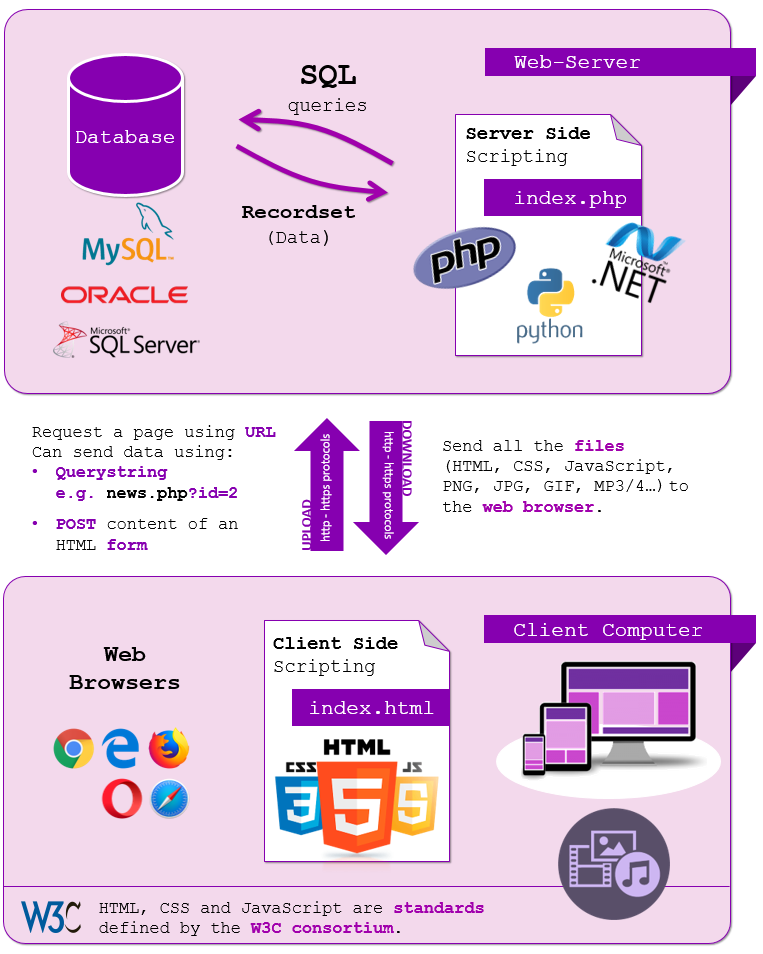

## 자세한 정보 가져오기

- javascript를 호출하여, 서버에서 정보를 가져온 뒤, 클라이언트에서 페이지를 구성함

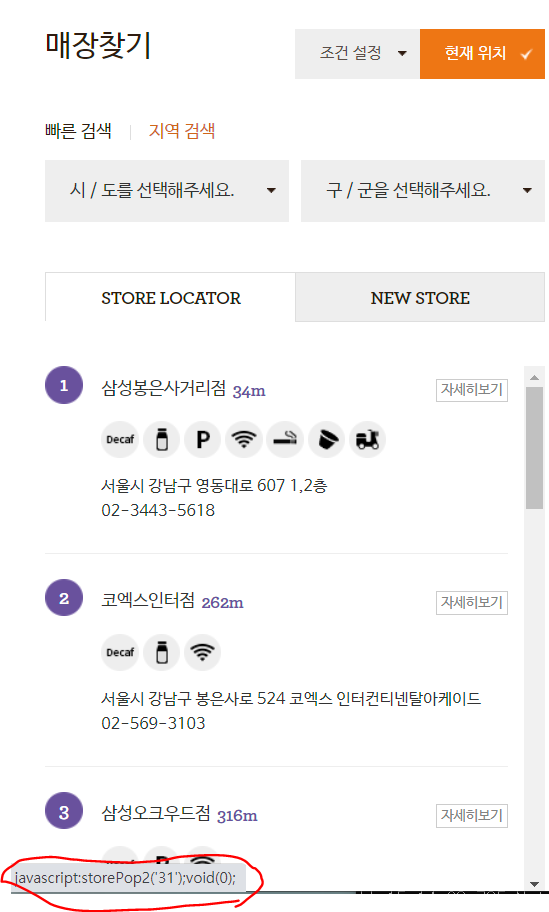

- popup 창을 띄움

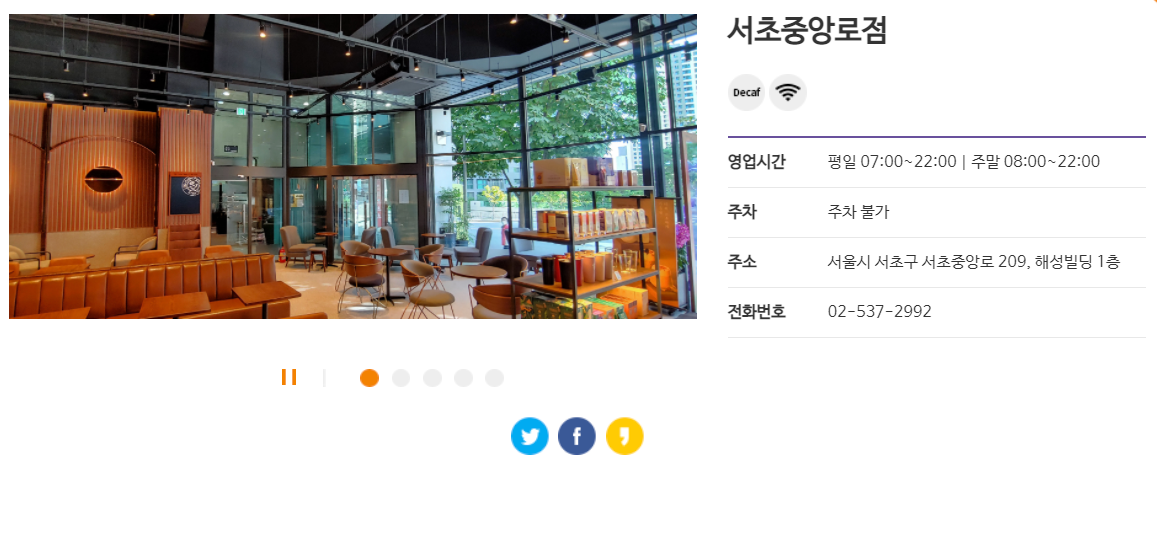

- 따라서, 위 scirpt를 호출하여 html 페이지를 만들고 그것을 파싱하면 됨


## Selenium 라이브러리 및 웹 드라이버 설치 

- 라이브러리

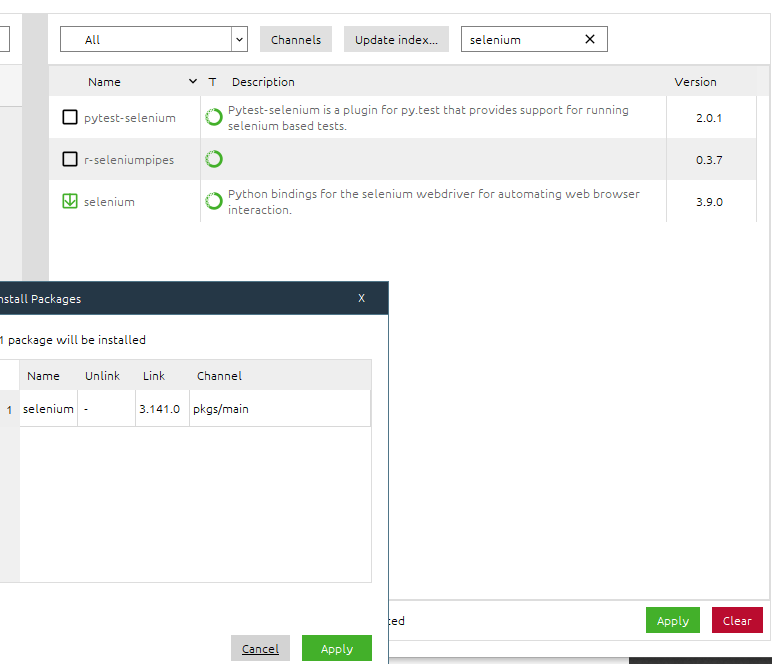

- WebDriver 

https://www.selenium.dev/downloads/ 의 [browsers] 에서 chromedriver.exe를 다운로드하여 실습 폴더에 저장




## import 와 webdriver 로딩


In [1]:
from selenium import webdriver
wd=webdriver.Chrome ("chromedriver.exe")

## 웹 페이지 로딩 및 script 실행

In [2]:
import time
wd.get("https://www.coffeebeankorea.com/store/store.asp")
wd.execute_script ("storePop2(1)")


## 결과 파싱

In [5]:
from bs4 import BeautifulSoup 

html=wd.page_source
soup= BeautifulSoup(html, 'html.parser')
soup.prettify()

'<html class="js canvas canvastext no-touch geolocation postmessage indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderradius boxshadow textshadow opacity cssanimations cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg" lang="ko-KR" style="">\n <!--<![endif]-->\n <head>\n  <script async="" src="https://www.google-analytics.com/plugins/ua/linkid.js" type="text/javascript">\n  </script>\n  <script async="" src="//www.google-analytics.com/analytics.js">\n  </script>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>\n  <title>\n   STORE | COFFEE BEAN KOREA\n  </title>\n  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densitydpi=medium-dpi" name="viewport"/>\n  <link href="/images/favicon.ico?v=1" rel="

In [6]:
soup.select ("div.store_txt > h2")

[<h2>학동역 DT점</h2>]

In [7]:
soup.select("div.store_txt > table.store_table ")

[<table class="store_table"> <tbody> <tr> <th>영업시간</th> <td>평일 07:00~22:00ㅣ주말/공휴일 08:00~22:00</td> </tr> <tr> <th>주차</th> <td>DT(드라이브 스루) 매장입니다. (주차는 불가)</td> </tr> <tr> <th>주소</th> <td>서울시 강남구 학동로 211 1층  <!--span class="lot">(서울시 강남구 학동로 211 1층)</span--></td> </tr> <tr> <th>전화번호</th> <td>02-3444-9973</td> </tr> </tbody><tbody> </tbody></table>]

In [8]:
soup.select ("div.store_txt > table.store_table > tbody >  tr > td")

[<td>평일 07:00~22:00ㅣ주말/공휴일 08:00~22:00</td>,
 <td>DT(드라이브 스루) 매장입니다. (주차는 불가)</td>,
 <td>서울시 강남구 학동로 211 1층  <!--span class="lot">(서울시 강남구 학동로 211 1층)</span--></td>,
 <td>02-3444-9973</td>]

In [9]:
storeinfo=soup.select ("div.store_txt > table.store_table > tbody >  tr > td")
list(storeinfo[2])

['서울시 강남구 학동로 211 1층  ', 'span class="lot">(서울시 강남구 학동로 211 1층)</span']

## coffebean crawler

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

from selenium import webdriver
import time

#[CODE 1]
def CoffeeBean_store(result):
    CoffeeBean_URL = "https://www.coffeebeankorea.com/store/store.asp"
    wd = webdriver.Chrome('chromedriver.exe')
             
    for i in range(1, 370):  #매장 수 만큼 반복
        wd.get(CoffeeBean_URL)
        time.sleep(1)  #웹페이지 연결할 동안 1초 대기
        try:
            wd.execute_script("storePop2(%d)" %i)
            time.sleep(1) #스크립트 실행 할 동안 1초 대기
            html = wd.page_source
            soupCB = BeautifulSoup(html, 'html.parser')
            store_name_h2 = soupCB.select("div.store_txt > h2")
            store_name = store_name_h2[0].string
            print(store_name)  #매장 이름 출력하기
            store_info = soupCB.select("div.store_txt > table.store_table > tbody > tr > td")
            store_address_list = list(store_info[2])
            store_address = store_address_list[0]
            store_phone = store_info[3].string
            result.append([store_name]+[store_address]+[store_phone])
        except:
            continue 
    return

#[CODE 0]
def main():
    result = []
    print('CoffeeBean store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    CoffeeBean_store(result)  #[CODE 1]
    
    CB_tbl = pd.DataFrame(result, columns=('store', 'address','phone'))
    CB_tbl.to_csv('CoffeeBean.csv', encoding='cp949', mode='w', index=True)

if __name__ == '__main__':
     main()

## 다른 방법 :  url 직접 호출 

- API화되는 웹프로그래밍 :  공개되지 않은 api 처럼 활용하여 crawling
- store.js 참조 

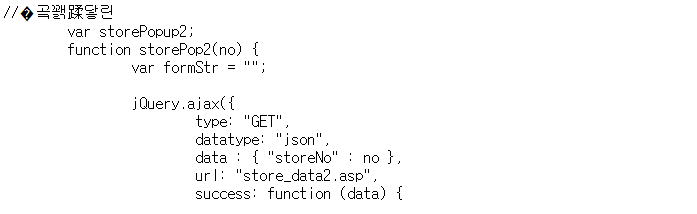

In [108]:
import urllib.request
api_url= "http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=40"
result = urllib.request.urlopen(api_url)
result

In [109]:
# 지난 시간에 만들었던 함수
import datetime

def getRequestUrl(url):    
    req = urllib.request.Request(url)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
        
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

jtxt=getRequestUrl(api_url)
jtxt

[2021-03-25 22:04:23.930324] Url Request Success


'[]'

In [99]:
import json
jobj= json.loads(jtxt)

## Json parsing error 가 나므로 hjson을 설치하여 사용

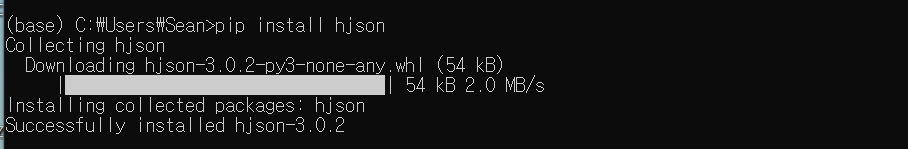

In [92]:
import hjson
jobj=hjson.loads(jtxt)
jobj

[OrderedDict([('StoreNo', '38'),
              ('StoreName', '논현동수면센터점'),
              ('StoreTel', '02-3443-5575'),
              ('StoreAddress', '서울시 강남구 논현로 717 1층'),
              ('StoreOpendate', '월-금 07:30~22:00 | 토,일,공휴일 09:00~21:00'),
              ('StoreLAT', '37.515922'),
              ('StoreLNG', '127.029524'),
              ('StoreShortDesc',
               '병원 건물 주차장 사용 - 발렛비 3,000원 발생, 일요일과 공휴일 무료 주차가능'),
              ('StoreEmail', 'cbk129@coffeebeankorea.com'),
              ('StoreDecaffeine', '1'),
              ('StoreSoymilk', '0'),
              ('StoreWifi', '1'),
              ('StoreParking', '1'),
              ('Storesmoking', '0'),
              ('StoreMachine', '0'),
              ('StoreCapsule', '0'),
              ('StoreCake', '0'),
              ('StoreDrive', '0'),
              ('StoreDelivery', '0'),
              ('Distant', ''),
              ('sort', '1'),
              ('StoreImage1', ''),
              ('StoreImage2', '38_00.jpg'),
       

In [93]:
jobj=jobj[0]

In [94]:
jobj['StoreName']

'논현동수면센터점'

In [95]:
jobj['StoreAddress']

'서울시 강남구 논현로 717 1층'

In [96]:
jobj['StoreTel']

'02-3443-5575'

## 과제2 : coffebean crawler를 url 직접 호출 방식으로 수정하기 

In [110]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

from selenium import webdriver
import time
import hjson

def getRequestUrl(url):    
    req = urllib.request.Request(url)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
        
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None



#[CODE 1]
def CoffeeBean_store(result):
    CoffeeBean_URL = "https://www.coffeebeankorea.com/store/store.asp"
             
    for i in range(1, 369):  #매장 수 만큼 반복     
        api_url= "http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=%d" %i
        print(api_url)
        try:
            jtxt = getRequestUrl(api_url)
            jobj = hjson.loads(jtxt)
            jobj = jobj[0]
            store_name = jobj['StoreName']
            store_address = jobj['StoreAddress']
            store_phone = jobj['StoreTel']
            result.append([store_name]+[store_address]+[store_phone])    
        except:
            continue 
    return

#[CODE 0]
def main():
    result = []
    print('CoffeeBean store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    CoffeeBean_store(result)  #[CODE 1]
    
    CB_tbl = pd.DataFrame(result, columns=('store', 'address','phone'))
    CB_tbl.to_csv('CoffeeBean.csv', encoding='cp949', mode='w', index=True)

if __name__ == '__main__':
     main()

CoffeeBean store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=40
[2021-03-25 22:05:29.101394] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=41
[2021-03-25 22:05:29.183276] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=42
[2021-03-25 22:05:29.271600] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=43
[2021-03-25 22:05:29.353155] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=44
[2021-03-25 22:05:29.434351] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=45
[2021-03-25 22:05:29.515903] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=46
[2021-03-25 22:05:29.614873] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=47
[2021-03-25 22:05:29.696426] Url Request Success
http://www.coffeebeankorea.com/store/store_

[2021-03-25 22:05:35.337369] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=115
[2021-03-25 22:05:35.418574] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=116
[2021-03-25 22:05:35.501194] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=117
[2021-03-25 22:05:35.582456] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=118
[2021-03-25 22:05:35.666487] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=119
[2021-03-25 22:05:35.753587] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=120
[2021-03-25 22:05:35.833800] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=121
[2021-03-25 22:05:35.915235] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=122
[2021-03-25 22:05:35.995978] Url Request Success
http://www.coffeebeankorea.com/store/st

[2021-03-25 22:05:41.453328] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=189
[2021-03-25 22:05:41.546482] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=190
[2021-03-25 22:05:41.630819] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=191
[2021-03-25 22:05:41.716364] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=192
[2021-03-25 22:05:41.804229] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=193
[2021-03-25 22:05:41.885555] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=194
[2021-03-25 22:05:41.971985] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=195
[2021-03-25 22:05:42.055566] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=196
[2021-03-25 22:05:42.137063] Url Request Success
http://www.coffeebeankorea.com/store/st

[2021-03-25 22:05:47.631197] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=263
[2021-03-25 22:05:47.715520] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=264
[2021-03-25 22:05:47.796297] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=265
[2021-03-25 22:05:47.879024] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=266
[2021-03-25 22:05:47.960948] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=267
[2021-03-25 22:05:48.044005] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=268
[2021-03-25 22:05:48.128145] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=269
[2021-03-25 22:05:48.210305] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=270
[2021-03-25 22:05:48.293144] Url Request Success
http://www.coffeebeankorea.com/store/st

[2021-03-25 22:05:53.588494] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=335
[2021-03-25 22:05:53.675120] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=336
[2021-03-25 22:05:53.758240] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=337
[2021-03-25 22:05:53.839727] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=338
[2021-03-25 22:05:53.921726] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=339
[2021-03-25 22:05:54.003807] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=340
[2021-03-25 22:05:54.084440] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=341
[2021-03-25 22:05:54.166395] Url Request Success
http://www.coffeebeankorea.com/store/store_data2.asp?storeNo=342
[2021-03-25 22:05:54.247782] Url Request Success
http://www.coffeebeankorea.com/store/st

hw04.ipynb 파일에 과제1, 과제2 같이 넣어서 제출 